In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sqlalchemy

## Data Acquisition

### Live Demos

This is some text
$$y = ax + b$$

In [2]:
pd.DataFrame({"name": ["Ivan", "Georgi"], "surname": ["Angelov", "Ivanov"], "age": [32, 15]})

,name,surname,age
0,Ivan,Angelov,32
1,Georgi,Ivanov,15


### You could read a table by pd.read_table or pd.read_csv

In [3]:
pd.read_table("data/accidents.csv", sep = ",")

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [4]:
pd.read_csv("data/accidents.csv")

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [5]:
type(pd.read_csv("data/accidents.csv"))

pandas.core.frame.DataFrame

### You could add a column to a variable and use it later:

In [6]:
accidents = pd.read_csv("data/accidents.csv")

In [7]:
accidents

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


### Index by rows [0, 6) by step 1

In [8]:
accidents.index

RangeIndex(start=0, stop=6, step=1)

### Columns

In [9]:
accidents.columns

Index(['Miles from Home', '% of Accidents'], dtype='object')

### Reach by column name like dictionary:

In [10]:
accidents["Miles from Home"]

0    less than 1
1         1 to 5
2        6 to 10
3       11 to 15
4       16 to 20
5        over 20
Name: Miles from Home, dtype: object

In [11]:
accidents[["Miles from Home"]]

,Miles from Home
0,less than 1
1,1 to 5
2,6 to 10
3,11 to 15
4,16 to 20
5,over 20


In [12]:
type(accidents[["Miles from Home"]])

pandas.core.frame.DataFrame

In [13]:
type(accidents["Miles from Home"])

pandas.core.series.Series

### We could give a name to the columns

In [14]:
accidents.columns = ["miles_from_home", "pct_of_accidents"]

In [15]:
accidents

,miles_from_home,pct_of_accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


### Now we could call it like dictionary - with [] or with dot:

In [16]:
accidents["miles_from_home"]

0    less than 1
1         1 to 5
2        6 to 10
3       11 to 15
4       16 to 20
5        over 20
Name: miles_from_home, dtype: object

In [17]:
accidents.miles_from_home

0    less than 1
1         1 to 5
2        6 to 10
3       11 to 15
4       16 to 20
5        over 20
Name: miles_from_home, dtype: object

### How many columns and rows contains my table

In [18]:
accidents.shape

(6, 2)

In [19]:
accidents.describe()

,pct_of_accidents
count,6.000000
mean,16.666667
std,8.733079
min,6.000000
25%,10.250000
50%,17.000000
75%,21.500000
max,29.000000


In [20]:
accidents.describe().T

,count,mean,std,min,25%,50%,75%,max
pct_of_accidents,6.0,16.666667,8.733079,6.0,10.25,17.0,21.5,29.0


In [21]:
accidents.dtypes

miles_from_home     object
pct_of_accidents     int64
dtype: object

### Index change

In [22]:
accidents.index = [7, 17, 20, 4, 2, -1]

In [23]:
accidents

,miles_from_home,pct_of_accidents
7,less than 1,23
17,1 to 5,29
20,6 to 10,17
4,11 to 15,8
2,16 to 20,6
-1,over 20,17


### We could reset the index again

In [24]:
accidents.reset_index()

,index,miles_from_home,pct_of_accidents
0,7,less than 1,23
1,17,1 to 5,29
2,20,6 to 10,17
3,4,11 to 15,8
4,2,16 to 20,6
5,-1,over 20,17


### We could create new table

In [25]:
accidents_new_index = accidents.reset_index(drop=True)

In [26]:
accidents_new_index

,miles_from_home,pct_of_accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [27]:
accidents

,miles_from_home,pct_of_accidents
7,less than 1,23
17,1 to 5,29
20,6 to 10,17
4,11 to 15,8
2,16 to 20,6
-1,over 20,17


### Add a number to a column

In [28]:
accidents.pct_of_accidents += 1000

In [29]:
accidents

,miles_from_home,pct_of_accidents
7,less than 1,1023
17,1 to 5,1029
20,6 to 10,1017
4,11 to 15,1008
2,16 to 20,1006
-1,over 20,1017


### Save to another csv

In [30]:
accidents.to_csv("modified.csv")

### Reading from internet dataset

In [31]:
pd.read_csv("https://github.com/plotly/datasets/raw/master/data.csv")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [32]:
credit_risk_data = pd.read_csv("https://github.com/plotly/datasets/raw/master/data.csv")

In [33]:
credit_risk_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [34]:
credit_risk_data.shape

(150000, 11)

In [35]:
credit_risk_data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [36]:
credit_risk_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [37]:
credit_risk_data["SeriousDlqin2yrs"] = credit_risk_data["SeriousDlqin2yrs"].astype("category")

In [38]:
credit_risk_data.dtypes

SeriousDlqin2yrs                        category
RevolvingUtilizationOfUnsecuredLines     float64
age                                        int64
NumberOfTime30-59DaysPastDueNotWorse       int64
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans            int64
NumberOfTimes90DaysLate                    int64
NumberRealEstateLoansOrLines               int64
NumberOfTime60-89DaysPastDueNotWorse       int64
NumberOfDependents                       float64
dtype: object

In [39]:
green_trip_data = pd.read_excel("data/green_tripdata_2015-09.xls")

#### Count rows, columns

In [40]:
green_trip_data.shape

(65535, 21)

#### Data types

In [41]:
green_trip_data.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

#### Columns

In [42]:
green_trip_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

#### Average for column Fare_amount

In [43]:
green_trip_data.Fare_amount.mean()

12.403889982452124

#### Histogram

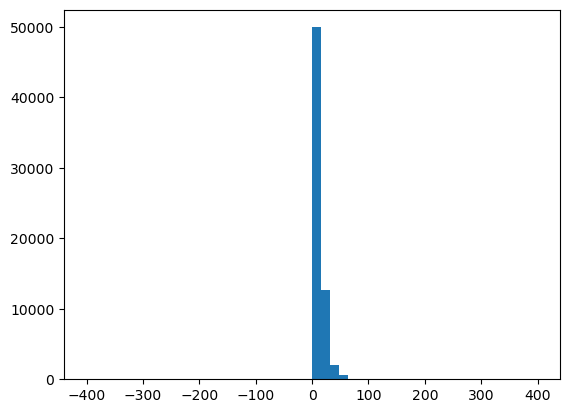

In [44]:
plt.hist(green_trip_data.Fare_amount, bins=50)
plt.show()

#### Positive amounts

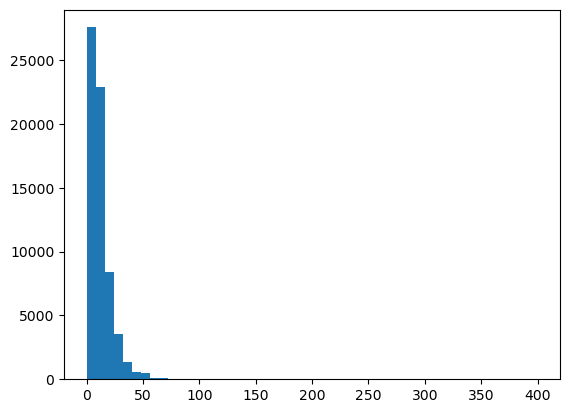

In [45]:
plt.hist(green_trip_data.Fare_amount[green_trip_data.Fare_amount > 0], bins=50)
plt.show()

### How to read from API

In [46]:
pd.read_json(
    "https://openlibrary.org/api/books?bibkeys=ISBN:9780345354907,ISBN:0881847690,LCCN:2005041555,ISBN:0060957905&format=json",
orient="index"
)

,bib_key,info_url,preview,preview_url,thumbnail_url
ISBN:9780345354907,ISBN:9780345354907,https://openlibrary.org/books/OL9831606M/The_C...,restricted,https://archive.org/details/caseofcharlesdex00...,https://covers.openlibrary.org/b/id/207586-S.jpg
ISBN:0881847690,ISBN:0881847690,https://openlibrary.org/books/OL22232644M/Watc...,restricted,https://archive.org/details/watchersoutoftim00...,https://covers.openlibrary.org/b/id/9871313-S.jpg
LCCN:2005041555,LCCN:2005041555,https://openlibrary.org/books/OL3421202M/At_th...,restricted,https://archive.org/details/atmountainsofmad00...,https://covers.openlibrary.org/b/id/8259841-S.jpg
ISBN:0060957905,ISBN:0060957905,https://openlibrary.org/books/OL6784868M/Tales...,noview,https://openlibrary.org/books/OL6784868M/Tales...,https://covers.openlibrary.org/b/id/676505-S.jpg


DB da drypna tuk

https://github.com/Microsoft/sql-server-samples/tree/master/samples/databases/adventure-works